In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Let's creaet few figures and save as svg files.

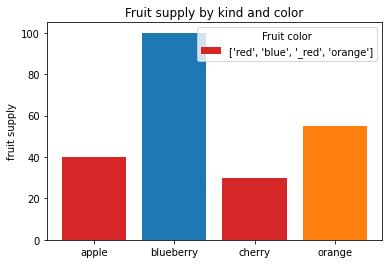

In [2]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

# plt.savefig('x.svg')
plt.savefig('x.png')

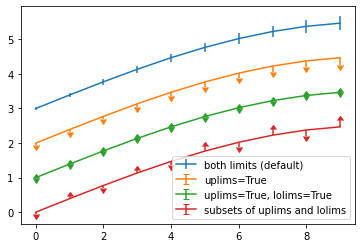

In [3]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

plt.savefig('y.svg')

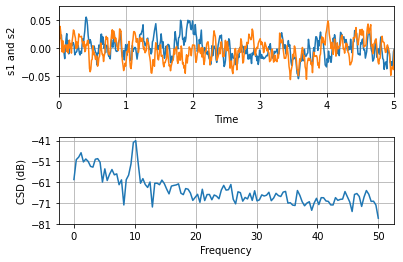

In [4]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

np.random.seed(19680801)

nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt
cnse2 = np.convolve(nse2, r, mode='same') * dt

s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.savefig('z.svg')

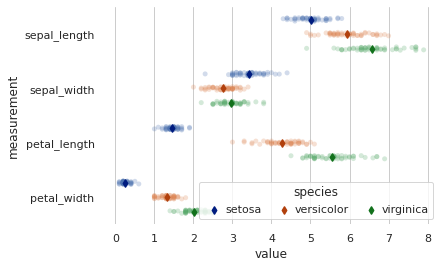

In [5]:
sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

iris = pd.melt(iris, "species", var_name="measurement")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=True, alpha=.25, zorder=1, legend=False
)

sns.pointplot(
    data=iris, x="value", y="measurement", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)

plt.savefig('k.svg')

Now create pdf panel from svg files using cli.

In [6]:
! figure_panel -f '[y.svg, x.png],[z.svg]' -o example.pdf --fontsize 36

In [7]:
from IPython.display import IFrame

IFrame("./example.pdf", width=600, height=300)

Or using python interface:

In [8]:
from figure_panel import create_panel

In [9]:
create_panel([
    ['x.svg', 'y.svg'], 
    ['z.svg', [['x.svg', 'y.svg'], ['z.svg', 'k.svg']]]
]).save('example2.pdf')

In [10]:
! figure_panel -f '[x.svg, y.svg],[z.svg, [[x.svg, y.svg], [z.svg, k.svg]]]' -o example.png --fontsize 16